In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [3]:
df = pd.read_csv('../DSI-CHI-1/lessons/week-07/2.3-pca-lab-1/assets/datasets/Airport_operations.csv')

In [4]:
df.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [5]:
df.columns

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay'],
      dtype='object')

In [6]:
y = df['airport']

In [7]:
y.head()

0    ABQ
1    ABQ
2    ABQ
3    ABQ
4    ABQ
Name: airport, dtype: object

In [14]:
for col in columns:
    x = df[[col for col in df.columns if col != 'airport']]

In [15]:
x.head()

,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [16]:
x.isnull().any()

year                                  False
departures for metric computation     False
arrivals for metric computation       False
percent on-time gate departures       False
percent on-time airport departures    False
percent on-time gate arrivals         False
average_gate_departure_delay          False
average_taxi_out_time                 False
average taxi out delay                False
average airport departure delay       False
average airborne delay                False
average taxi in delay                 False
average block delay                   False
average gate arrival delay            False
dtype: bool

In [18]:
# now lets standardize our data

jet_setter = StandardScaler().fit_transform(x)

In [19]:
jet_setter

array([[-1.59402353, -0.55269892, -0.55179125, ..., -0.58849731,
        -0.76079377, -0.70168278],
       [-1.27702807, -0.57450712, -0.57162597, ..., -0.52044906,
        -0.9654201 , -0.84232194],
       [-0.96003261, -0.59636622, -0.57855433, ..., -0.57715593,
        -0.65360855, -0.48960786],
       ..., 
       [ 0.94194013, -1.05379873, -1.05283011, ..., -1.52983138,
         0.49619655,  3.2161224 ],
       [ 1.25893558, -1.04012533, -1.03874858, ..., -1.52983138,
        -0.41000577,  3.07548324],
       [ 1.57593104, -1.02672683, -1.02436048, ..., -1.52983138,
         0.5449171 ,  3.33890262]])

In [20]:
jet_setter.shape

(841, 14)

In [22]:
cov_matrix = np.cov(jet_setter.T)
cov_matrix[0:3]

array([[ 1.00119048, -0.06920457, -0.06826954,  0.01430972,  0.05008518,
         0.09204365,  0.02317489, -0.0430656 , -0.154516  , -0.02867646,
        -0.32755534, -0.03635544, -0.31670106, -0.05966818],
       [-0.06920457,  1.00119048,  1.00100766,  0.12231773, -0.16437507,
         0.20939557, -0.05539575,  0.6537683 ,  0.62938398,  0.20681577,
         0.33684867,  0.83124203,  0.29425884, -0.0557856 ],
       [-0.06826954,  1.00100766,  1.00119048,  0.12232288, -0.16397662,
         0.20945784, -0.0560545 ,  0.65186846,  0.62868998,  0.20597707,
         0.3357403 ,  0.83028795,  0.29142547, -0.05643154]])

In [23]:
cov_matrix.shape

(14, 14)

In [24]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [25]:
eigenvalues.shape

(14,)

In [29]:
eigenvalues[0:10]

array([ 6.45349601,  4.30952372,  1.21824879,  0.73787539,  0.51095456,
        0.34935322,  0.16679928,  0.12022052,  0.07320368,  0.06419244])

In [26]:
eigenvectors.shape

(14, 14)

In [31]:
eigenvectors[0:3]

array([[-0.05747614,  0.05252557,  0.80890976, -0.38914338, -0.01517249,
        -0.40455823, -0.03918196, -0.01319762,  0.14376054, -0.00777298,
        -0.03107428, -0.02933693,  0.00229607,  0.001993  ],
       [ 0.11683294, -0.41190929,  0.16980855,  0.40257614, -0.12274015,
        -0.11232074,  0.29026653,  0.06082036,  0.07665943,  0.03325464,
        -0.02178517,  0.02057546,  0.70799524,  0.03171276],
       [ 0.1164079 , -0.41158191,  0.17108429,  0.40387107, -0.12540936,
        -0.10989401,  0.29134664,  0.06552886,  0.09065779,  0.03221664,
        -0.03615976, -0.02653745, -0.70372734, -0.03443946]])

In [32]:
eigenpairs = zip(eigenvalues, eigenvectors)
eigenpairs

[(6.4534960079102319,
  array([-0.05747614,  0.05252557,  0.80890976, -0.38914338, -0.01517249,
         -0.40455823, -0.03918196, -0.01319762,  0.14376054, -0.00777298,
         -0.03107428, -0.02933693,  0.00229607,  0.001993  ])),
 (4.3095237244909841,
  array([ 0.11683294, -0.41190929,  0.16980855,  0.40257614, -0.12274015,
         -0.11232074,  0.29026653,  0.06082036,  0.07665943,  0.03325464,
         -0.02178517,  0.02057546,  0.70799524,  0.03171276])),
 (1.218248788447476,
  array([ 0.1164079 , -0.41158191,  0.17108429,  0.40387107, -0.12540936,
         -0.10989401,  0.29134664,  0.06552886,  0.09065779,  0.03221664,
         -0.03615976, -0.02653745, -0.70372734, -0.03443946])),
 (0.73787539358931009,
  array([-0.31455588, -0.25353041, -0.11887711, -0.22456082,  0.12369052,
         -0.06827278,  0.05434861,  0.32677046,  0.00236581,  0.32971135,
         -0.19934018,  0.66876199, -0.03004708,  0.2143065 ])),
 (0.51095455771136955,
  array([-0.37512831, -0.07870829, -0.100

In [33]:
for i in sorted(eigenpairs, reverse=True):
    print i

(6.4534960079102319, array([-0.05747614,  0.05252557,  0.80890976, -0.38914338, -0.01517249,
       -0.40455823, -0.03918196, -0.01319762,  0.14376054, -0.00777298,
       -0.03107428, -0.02933693,  0.00229607,  0.001993  ]))
(4.3095237244909841, array([ 0.11683294, -0.41190929,  0.16980855,  0.40257614, -0.12274015,
       -0.11232074,  0.29026653,  0.06082036,  0.07665943,  0.03325464,
       -0.02178517,  0.02057546,  0.70799524,  0.03171276]))
(1.218248788447476, array([ 0.1164079 , -0.41158191,  0.17108429,  0.40387107, -0.12540936,
       -0.10989401,  0.29134664,  0.06552886,  0.09065779,  0.03221664,
       -0.03615976, -0.02653745, -0.70372734, -0.03443946]))
(0.73787539358931009, array([-0.31455588, -0.25353041, -0.11887711, -0.22456082,  0.12369052,
       -0.06827278,  0.05434861,  0.32677046,  0.00236581,  0.32971135,
       -0.19934018,  0.66876199, -0.03004708,  0.2143065 ]))
(0.51095455771136955, array([-0.37512831, -0.07870829, -0.10089244, -0.0109185 ,  0.13462459,
  

In [34]:
eigansums = sum(eigenvalues)
eigansums

14.016666666666671

In [35]:
#for other graph
for eig in sorted(eigenpairs, reverse=True):
    print eig[0] / eigansums, eig[0]

0.460415886415 6.45349600791
0.307457102817 4.30952372449
0.0869143011972 1.21824878845
0.0526427153571 0.737875393589
0.0364533572683 0.510954557711
0.02492412996 0.349353221606
0.0119000671954 0.166799275189
0.00857696898315 0.120220515247
0.00522261699008 0.0732036814776
0.004579722061 0.0641924375551
0.000684238706369 0.0095907458676
0.0001671329354 0.00234264664452
5.00337606696e-05 0.000701306545385
1.17263532649e-05 0.00016436438493


In [ ]:
skree plot to decide which component # to use
plt.plot(range(1,15), cumairvar)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Variance Explained")
plt.show()

In [42]:
# i like the look of 5 components

percents = np.cumsum([(eig / eigansums) * 100 for eig in sorted(eigenvalues, reverse=True)])
percents

array([  46.04158864,   76.78729892,   85.47872904,   90.74300058,
         94.38833631,   96.8807493 ,   98.07075602,   98.92845292,
         99.45071462,   99.90868682,   99.9771107 ,   99.99382399,
         99.99882736,  100.        ])

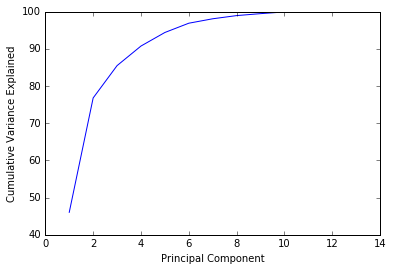

In [43]:
# skree

plt.plot(range(1,15), percents)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Variance Explained")
plt.show()
by adding additional components

In [37]:
fit_me = []

for eigenpair in sorted(eigenpairs, reverse=True)[0:5]:
    fit_me.append(eigenpair[1].reshape(14,1))
    print eigenpair

(6.4534960079102319, array([-0.05747614,  0.05252557,  0.80890976, -0.38914338, -0.01517249,
       -0.40455823, -0.03918196, -0.01319762,  0.14376054, -0.00777298,
       -0.03107428, -0.02933693,  0.00229607,  0.001993  ]))
(4.3095237244909841, array([ 0.11683294, -0.41190929,  0.16980855,  0.40257614, -0.12274015,
       -0.11232074,  0.29026653,  0.06082036,  0.07665943,  0.03325464,
       -0.02178517,  0.02057546,  0.70799524,  0.03171276]))
(1.218248788447476, array([ 0.1164079 , -0.41158191,  0.17108429,  0.40387107, -0.12540936,
       -0.10989401,  0.29134664,  0.06552886,  0.09065779,  0.03221664,
       -0.03615976, -0.02653745, -0.70372734, -0.03443946]))
(0.73787539358931009, array([-0.31455588, -0.25353041, -0.11887711, -0.22456082,  0.12369052,
       -0.06827278,  0.05434861,  0.32677046,  0.00236581,  0.32971135,
       -0.19934018,  0.66876199, -0.03004708,  0.2143065 ]))
(0.51095455771136955, array([-0.37512831, -0.07870829, -0.10089244, -0.0109185 ,  0.13462459,
  

In [38]:
Pmatrix = np.hstack(fit_me)
Pmatrix

array([[-0.05747614,  0.11683294,  0.1164079 , -0.31455588, -0.37512831],
       [ 0.05252557, -0.41190929, -0.41158191, -0.25353041, -0.07870829],
       [ 0.80890976,  0.16980855,  0.17108429, -0.11887711, -0.10089244],
       [-0.38914338,  0.40257614,  0.40387107, -0.22456082, -0.0109185 ],
       [-0.01517249, -0.12274015, -0.12540936,  0.12369052,  0.13462459],
       [-0.40455823, -0.11232074, -0.10989401, -0.06827278, -0.21163599],
       [-0.03918196,  0.29026653,  0.29134664,  0.05434861,  0.02713532],
       [-0.01319762,  0.06082036,  0.06552886,  0.32677046,  0.37337147],
       [ 0.14376054,  0.07665943,  0.09065779,  0.00236581, -0.28950768],
       [-0.00777298,  0.03325464,  0.03221664,  0.32971135,  0.25837666],
       [-0.03107428, -0.02178517, -0.03615976, -0.19934018, -0.28505739],
       [-0.02933693,  0.02057546, -0.02653745,  0.66876199, -0.59655308],
       [ 0.00229607,  0.70799524, -0.70372734, -0.03004708,  0.03098046],
       [ 0.001993  ,  0.03171276, -0.0

In [39]:
Pmatrix.shape

(14, 5)

In [40]:
pca_yay = jet_setter.dot(Pmatrix)
pca_yay

array([[-0.73582882, -0.8981936 ,  0.24415271, -0.40301598,  0.81715227],
       [-0.8560509 , -1.03643399,  0.40225611, -0.53259111,  0.68662188],
       [-0.70098171, -0.69070428,  0.28755192, -0.44339305,  0.699785  ],
       ..., 
       [ 1.93952029,  0.8498573 , -0.02920043,  1.13176913,  1.17940689],
       [ 1.87021111,  0.27448004,  0.70354131,  1.29850692,  1.36429169],
       [ 1.8080568 ,  1.03302759,  0.08743702,  1.12860039,  1.08292979]])

In [49]:
# dont think I did this right--look over again

new_df = pd.DataFrame(pca_yay, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
new_df.head()

,pc1,pc2,pc3,pc4,pc5
0,-0.735829,-0.898194,0.244153,-0.403016,0.817152
1,-0.856051,-1.036434,0.402256,-0.532591,0.686622
2,-0.700982,-0.690704,0.287552,-0.443393,0.699785
3,-0.664297,-0.297358,0.094364,-0.115731,0.287699
4,-0.850994,-0.485286,0.314727,-0.451629,0.424802
